In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Load the cleaned dataset
df = pd.read_csv('final_cleaned.csv')

# Pivot the data to have pollutants as separate columns
df = df.pivot_table(values='value', index=['location', 'city', 'country', 'timestamp', 'latitude', 'longitude'], columns='pollutant').reset_index()

# Include pollutants and location, and drop rows with missing values
df = df[['latitude', 'longitude', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'co']].dropna()

In [15]:
df.drop(columns=['latitude', 'longitude'], inplace=True)

In [17]:
df.reset_index(drop=True, inplace=True)

In [19]:
df

pollutant,pm25,pm10,no2,so2,o3,co
0,11.00490,15.05950,20.29320,4.04394,45.8600,281.522
1,6.10774,7.84260,8.82229,2.00682,60.7611,256.811
2,6.68390,11.27310,3.00396,2.01421,77.3206,224.263
3,7.05426,8.37591,3.59084,2.72724,70.9611,236.714
4,6.89768,8.47832,4.42044,1.89229,69.3244,245.185
...,...,...,...,...,...,...
59334,7.62408,26.87570,31.00660,14.20000,30.4433,201.660
59335,7.76555,13.82210,9.43725,15.56760,54.1572,104.500
59336,10.57300,20.41160,9.41176,14.18960,46.3289,7.460
59337,13.52200,26.79870,23.86080,15.86660,87.1739,178.000


In [21]:
# Calculate percentiles for PM2.5 and PM10 within the dataset
pm25_33 = df['pm25'].quantile(0.33)
pm25_66 = df['pm25'].quantile(0.66)

pm10_33 = df['pm10'].quantile(0.33)
pm10_66 = df['pm10'].quantile(0.66)

# Define a categorization function based on these percentiles
def categorize_air_quality(row):
    if row['pm25'] <= pm25_33 and row['pm10'] <= pm10_33:
        return 'Low'
    elif (pm25_33 < row['pm25'] <= pm25_66) or (pm10_33 < row['pm10'] <= pm10_66):
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new target column
df['air_quality_category'] = df.apply(categorize_air_quality, axis=1)

# Check the distribution of the new target variable
print(df['air_quality_category'].value_counts())

air_quality_category
Medium    29318
High      16079
Low       13942
Name: count, dtype: int64


In [24]:
df.head()

pollutant,pm25,pm10,no2,so2,o3,co,air_quality_category
0,11.00490,15.05950,20.29320,4.04394,45.8600,281.522,Medium
1,6.10774,7.84260,8.82229,2.00682,60.7611,256.811,Low
2,6.68390,11.27310,3.00396,2.01421,77.3206,224.263,Medium
3,7.05426,8.37591,3.59084,2.72724,70.9611,236.714,Medium
4,6.89768,8.47832,4.42044,1.89229,69.3244,245.185,Medium


In [27]:
# Select features and label
X = df[['pm25', 'pm10', 'no2', 'so2', 'o3', 'co']]
y = df['air_quality_category']

In [30]:
X

pollutant,pm25,pm10,no2,so2,o3,co
0,11.00490,15.05950,20.29320,4.04394,45.8600,281.522
1,6.10774,7.84260,8.82229,2.00682,60.7611,256.811
2,6.68390,11.27310,3.00396,2.01421,77.3206,224.263
3,7.05426,8.37591,3.59084,2.72724,70.9611,236.714
4,6.89768,8.47832,4.42044,1.89229,69.3244,245.185
...,...,...,...,...,...,...
59334,7.62408,26.87570,31.00660,14.20000,30.4433,201.660
59335,7.76555,13.82210,9.43725,15.56760,54.1572,104.500
59336,10.57300,20.41160,9.41176,14.18960,46.3289,7.460
59337,13.52200,26.79870,23.86080,15.86660,87.1739,178.000


In [33]:
y

0        Medium
1           Low
2        Medium
3        Medium
4        Medium
          ...  
59334    Medium
59335    Medium
59336    Medium
59337    Medium
59338    Medium
Name: air_quality_category, Length: 59339, dtype: object

## Data Preparation

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
encoder = LabelEncoder()
df['air_quality_category_encoded'] = encoder.fit_transform(df['air_quality_category'])

# Define features and target
X = df.drop(columns=['air_quality_category', 'air_quality_category_encoded'])  # Features
y = df['air_quality_category_encoded']  # Encoded target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (47471, 6)
Testing features shape: (11868, 6)
Training target shape: (47471,)
Testing target shape: (11868,)


In [41]:
X_train.head()

pollutant,pm25,pm10,no2,so2,o3,co
14875,15.000,17.000,2.000000,3.000000,17.000000,100.00
20321,5.000,31.200,2.900000,3.200000,75.800000,140.00
58882,8.523,41.355,0.004008,0.014395,0.044314,0.23
18558,24.440,61.160,21.690000,1.320000,8.650000,610.00
8850,6.100,11.000,0.005000,0.001000,0.035000,0.14


In [44]:
y_train.head()

14875    2
20321    0
58882    2
18558    0
8850     1
Name: air_quality_category_encoded, dtype: int32

In [47]:
X_test.head()

pollutant,pm25,pm10,no2,so2,o3,co
16355,31.844,30.585,0.017317,0.012479,0.009611,0.669
17663,8.000,26.000,0.003000,0.000000,0.054000,0.150
33245,10.000,47.000,0.014000,0.000000,0.029000,0.080
15669,2.000,4.000,5.000000,2.000000,66.000000,100.000
34966,2.200,6.000,0.001000,0.000000,0.026000,0.120


In [50]:
y_test.head()

16355    2
17663    2
33245    2
15669    1
34966    1
Name: air_quality_category_encoded, dtype: int32

## SVM Implementation

Training SVM with kernel=linear and C=0.1
Accuracy: 88.78%
Confusion Matrix:
 [[2656    0  548]
 [   0 2637  186]
 [ 362  235 5244]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      3204
           1       0.92      0.93      0.93      2823
           2       0.88      0.90      0.89      5841

    accuracy                           0.89     11868
   macro avg       0.89      0.89      0.89     11868
weighted avg       0.89      0.89      0.89     11868



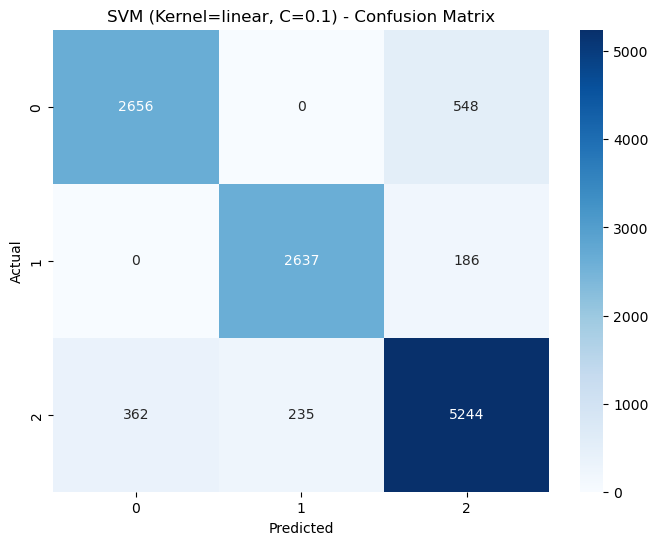

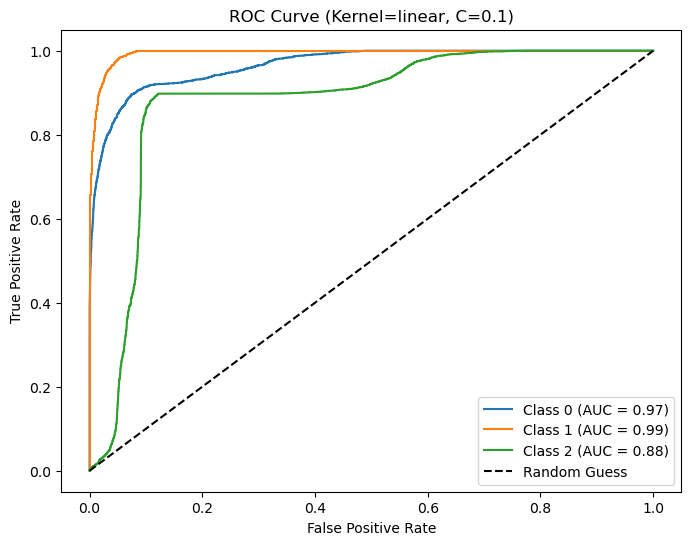

Training SVM with kernel=linear and C=1
Accuracy: 88.70%
Confusion Matrix:
 [[2656    0  548]
 [   0 2629  194]
 [ 361  238 5242]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      3204
           1       0.92      0.93      0.92      2823
           2       0.88      0.90      0.89      5841

    accuracy                           0.89     11868
   macro avg       0.89      0.89      0.89     11868
weighted avg       0.89      0.89      0.89     11868



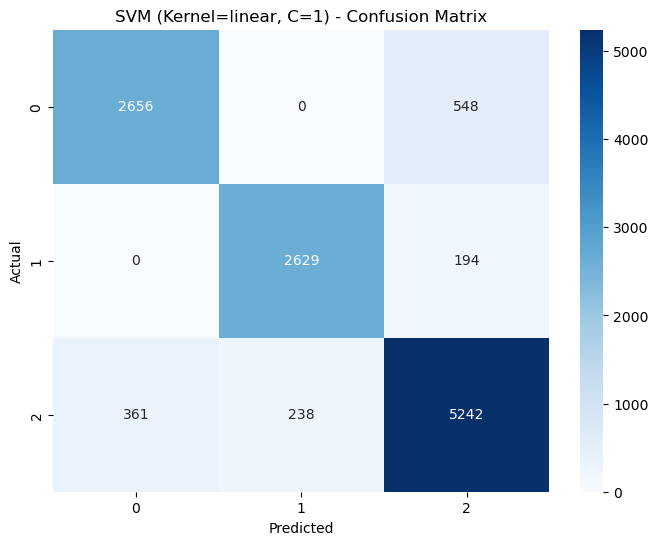

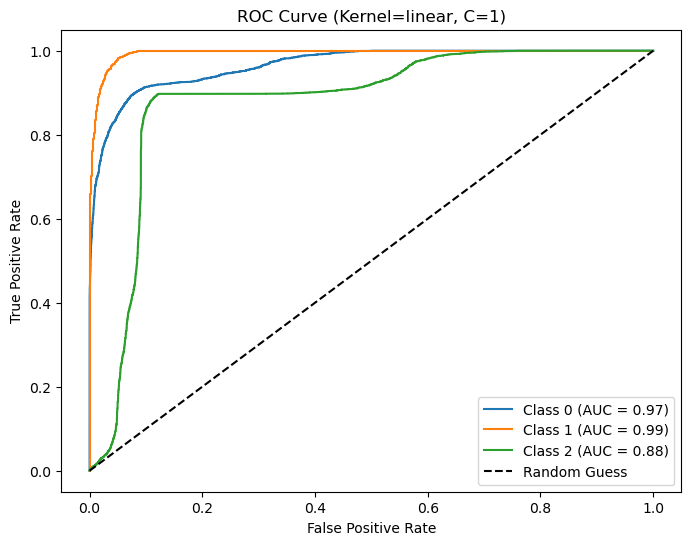

Training SVM with kernel=linear and C=10
Accuracy: 88.76%
Confusion Matrix:
 [[2656    0  548]
 [   0 2636  187]
 [ 361  238 5242]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      3204
           1       0.92      0.93      0.93      2823
           2       0.88      0.90      0.89      5841

    accuracy                           0.89     11868
   macro avg       0.89      0.89      0.89     11868
weighted avg       0.89      0.89      0.89     11868



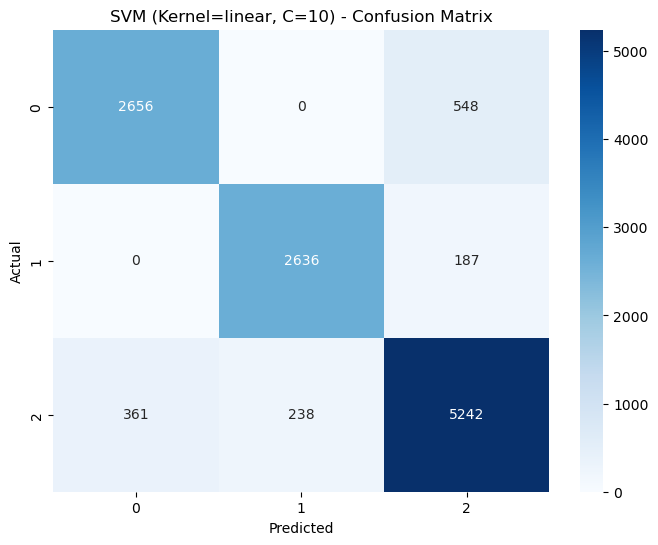

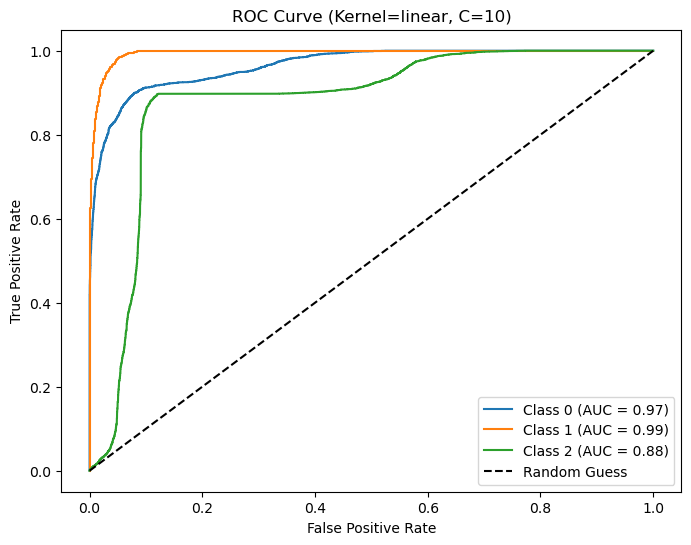

Training SVM with kernel=rbf and C=0.1
Accuracy: 91.36%
Confusion Matrix:
 [[2687    0  517]
 [   0 2637  186]
 [ 135  187 5519]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3204
           1       0.93      0.93      0.93      2823
           2       0.89      0.94      0.92      5841

    accuracy                           0.91     11868
   macro avg       0.92      0.91      0.91     11868
weighted avg       0.92      0.91      0.91     11868



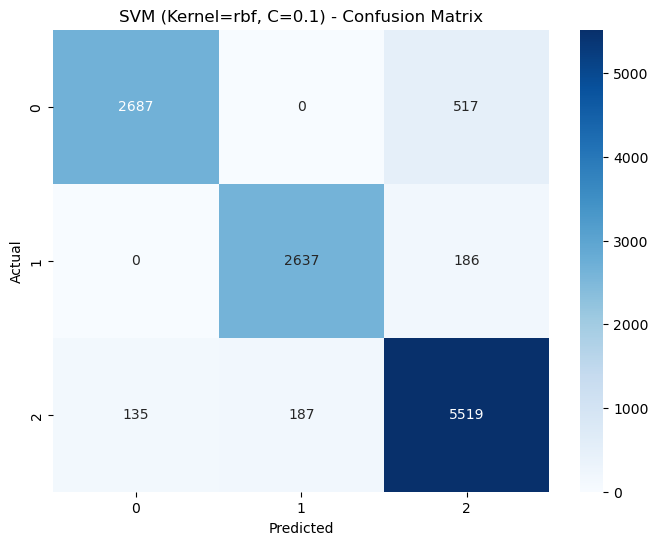

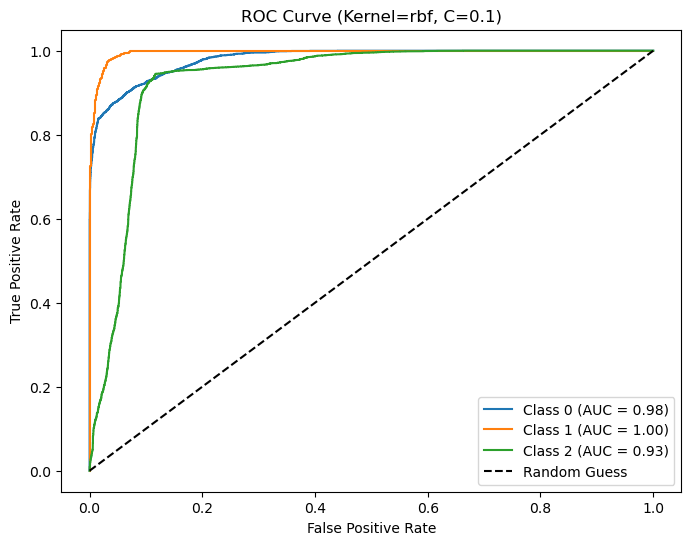

Training SVM with kernel=rbf and C=1
Accuracy: 94.03%
Confusion Matrix:
 [[2841    0  363]
 [   0 2706  117]
 [  84  144 5613]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3204
           1       0.95      0.96      0.95      2823
           2       0.92      0.96      0.94      5841

    accuracy                           0.94     11868
   macro avg       0.95      0.94      0.94     11868
weighted avg       0.94      0.94      0.94     11868



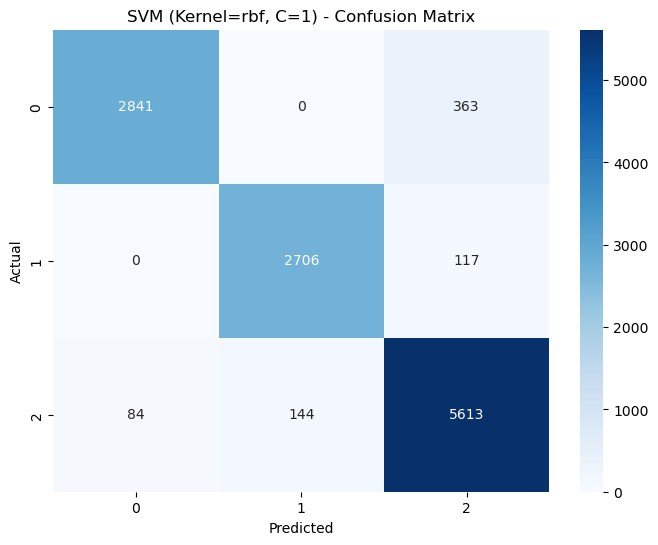

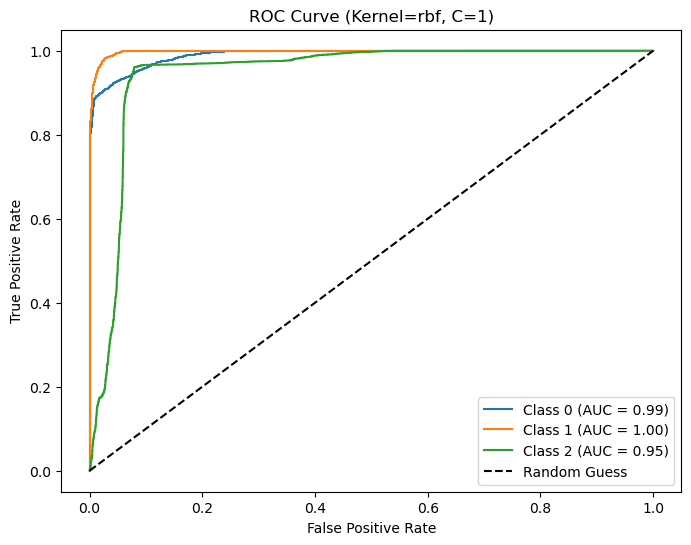

Training SVM with kernel=rbf and C=10
Accuracy: 96.57%
Confusion Matrix:
 [[2979    0  225]
 [   0 2753   70]
 [  53   59 5729]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      3204
           1       0.98      0.98      0.98      2823
           2       0.95      0.98      0.97      5841

    accuracy                           0.97     11868
   macro avg       0.97      0.96      0.97     11868
weighted avg       0.97      0.97      0.97     11868



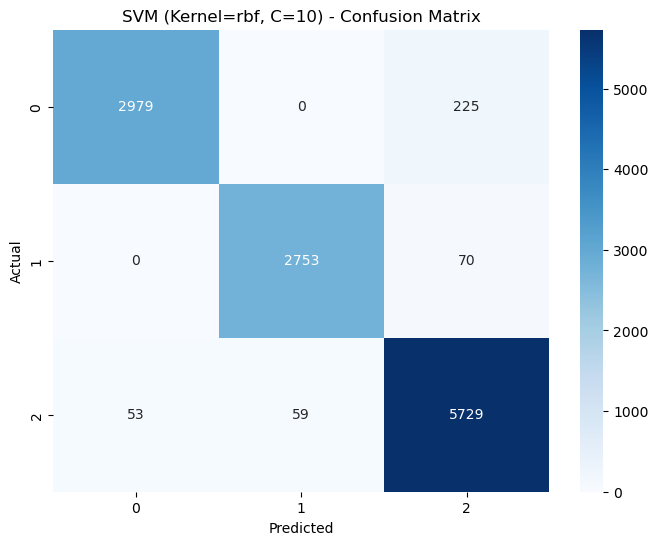

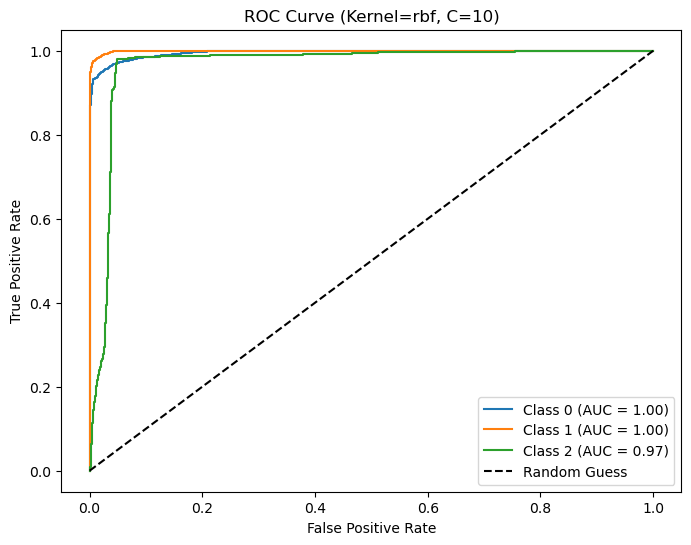

Training SVM with kernel=poly and C=0.1
Accuracy: 90.46%
Confusion Matrix:
 [[2537    1  666]
 [   0 2553  270]
 [  54  141 5646]]
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      3204
           1       0.95      0.90      0.93      2823
           2       0.86      0.97      0.91      5841

    accuracy                           0.90     11868
   macro avg       0.93      0.89      0.90     11868
weighted avg       0.91      0.90      0.90     11868



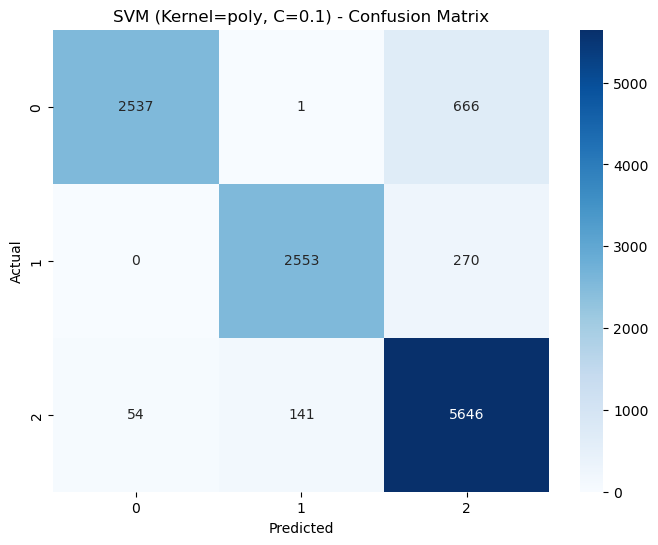

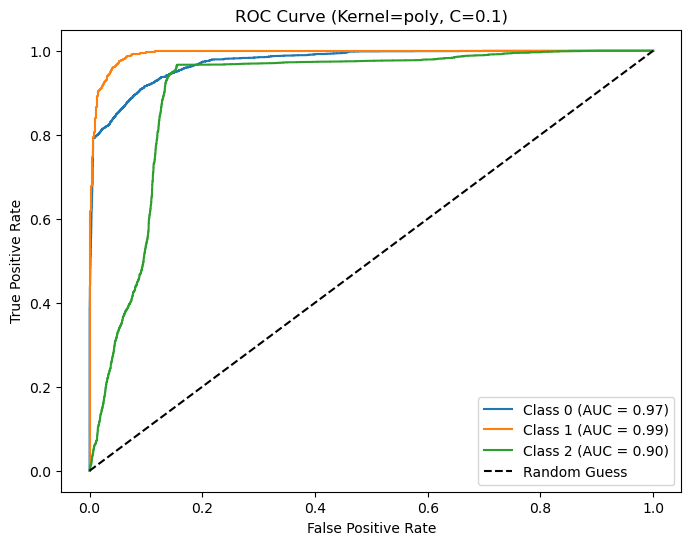

Training SVM with kernel=poly and C=1
Accuracy: 92.61%
Confusion Matrix:
 [[2741    0  463]
 [   0 2633  190]
 [  67  157 5617]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      3204
           1       0.94      0.93      0.94      2823
           2       0.90      0.96      0.93      5841

    accuracy                           0.93     11868
   macro avg       0.94      0.92      0.93     11868
weighted avg       0.93      0.93      0.93     11868



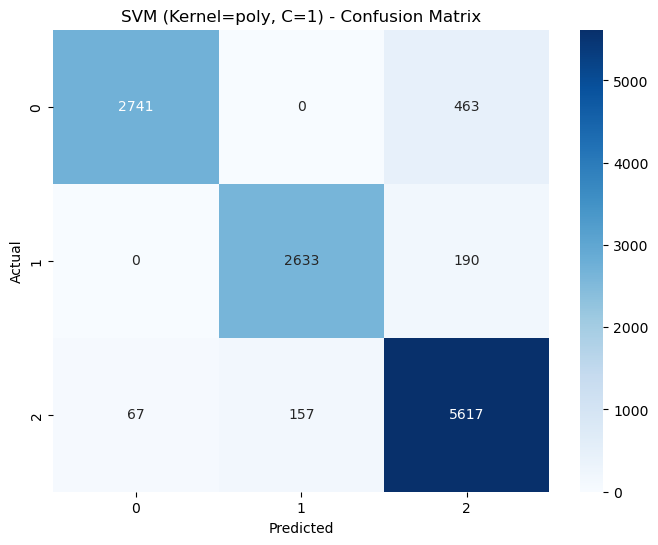

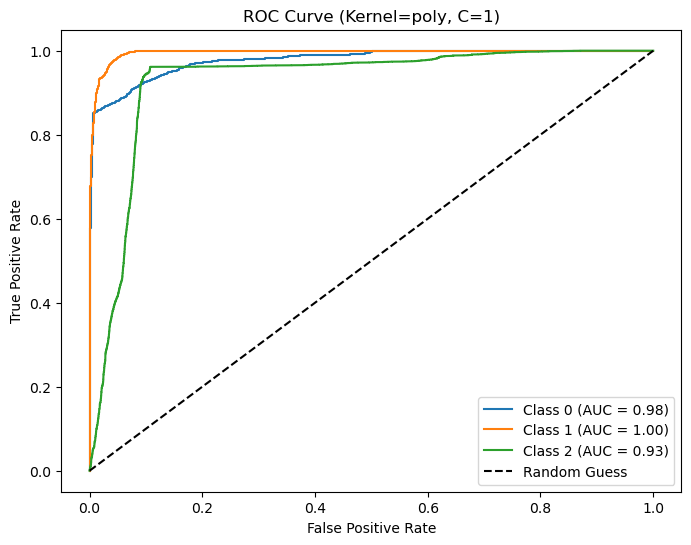

Training SVM with kernel=poly and C=10
Accuracy: 93.04%
Confusion Matrix:
 [[2807    0  397]
 [   0 2647  176]
 [  88  165 5588]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3204
           1       0.94      0.94      0.94      2823
           2       0.91      0.96      0.93      5841

    accuracy                           0.93     11868
   macro avg       0.94      0.92      0.93     11868
weighted avg       0.93      0.93      0.93     11868



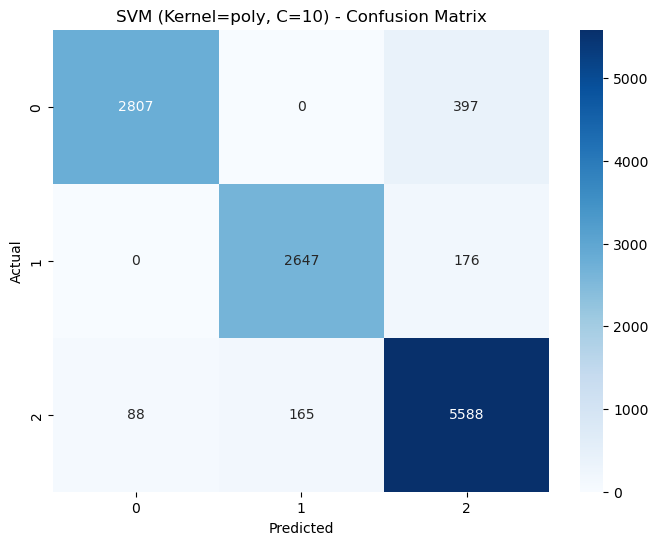

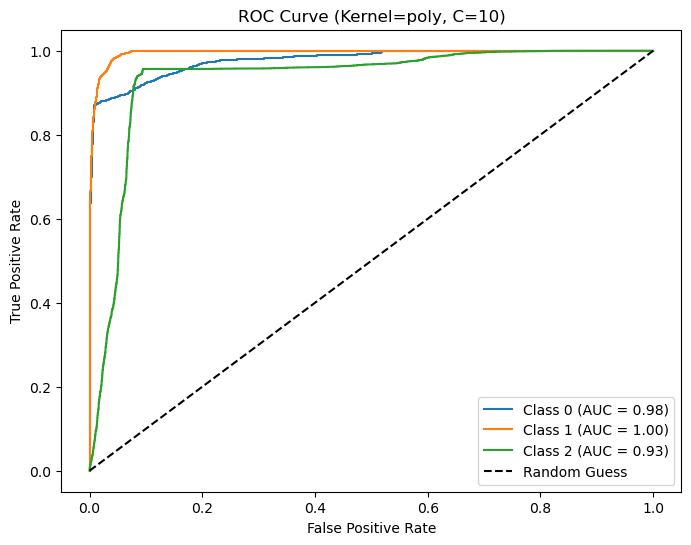

Comparison of SVM Models:
   Kernel     C  Accuracy
0  linear   0.1  0.887850
1  linear   1.0  0.887007
2  linear  10.0  0.887597
3     rbf   0.1  0.913633
4     rbf   1.0  0.940344
5     rbf  10.0  0.965706
6    poly   0.1  0.904617
7    poly   1.0  0.926104
8    poly  10.0  0.930401


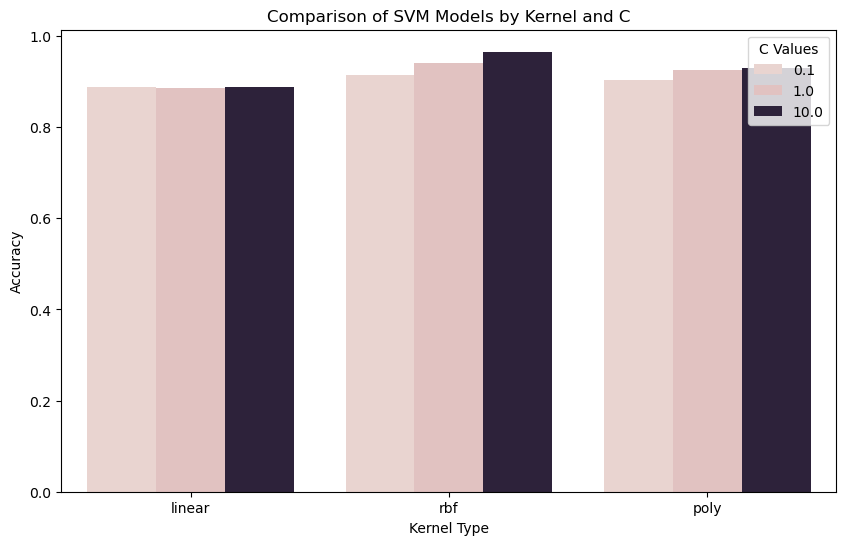

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import StandardScaler, label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kernels and C values to try
kernels = ['linear', 'rbf', 'poly']
C_values = [0.1, 1, 10]

# Store results for comparison
results = []

# Binarize target variable for ROC-AUC computation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Train SVM models with different kernels and C values
for kernel in kernels:
    for C in C_values:
        print(f"Training SVM with kernel={kernel} and C={C}")
        svc = SVC(kernel=kernel, C=C, probability=True, random_state=42)
        svc.fit(X_train_scaled, y_train)
        
        # Predict and evaluate
        y_pred = svc.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print("Confusion Matrix:\n", conf_matrix)
        print(classification_report(y_test, y_pred))
        
        # Store results
        results.append((kernel, C, accuracy))
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f"SVM (Kernel={kernel}, C={C}) - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
        
        # ROC-AUC for multiclass
        y_pred_prob = svc.decision_function(X_test_scaled)
        fpr = {}
        tpr = {}
        roc_auc = {}
        
        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

        plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
        plt.title(f"ROC Curve (Kernel={kernel}, C={C})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()

# Compare results
results_df = pd.DataFrame(results, columns=['Kernel', 'C', 'Accuracy'])
print("Comparison of SVM Models:")
print(results_df)

# Bar plot for accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Kernel", y="Accuracy", hue="C")
plt.title("Comparison of SVM Models by Kernel and C")
plt.ylabel("Accuracy")
plt.xlabel("Kernel Type")
plt.legend(title="C Values")
plt.show()